## Data Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [2]:
movies_df = pd.read_csv('movies_df.csv', index_col = 'title')

In [3]:
movies_df.head()

,link_stub,World Lifetime Gross,Domestic Lifetime Gross,Domestic %,Foreign Lifetime Gross,Foreign %,year,Domestic Distributor,Domestic Opening,budget,MPAA,Running Time,genres,Original Release Domestic,Original Release International,Original Release Worldwide
title,,,,,,,,,,,,,,,,
Avatar,/title/tt0499549/?ref_=bo_cso_table_1,"$2,847,246,203","$760,507,625",26.7%,"$2,086,738,578",73.3%,2009,Twentieth Century Fox\n\n,77025481,237000000,PG-13,162,"['Action', 'Adventure', 'Fantasy', 'Science fi...",749766139,1993811448,2743577587
Avengers: Endgame,/title/tt4154796/?ref_=bo_cso_table_2,"$2,797,501,328","$858,373,000",30.7%,"$1,939,128,328",69.3%,2019,Walt Disney Studios Motion Pictures\n\n,357115007,356000000,PG-13,181,"['Action', 'Adventure', 'Drama', 'Science fict...",858373000,1939128328,2797501328
Titanic,/title/tt0120338/?ref_=bo_cso_table_3,"$2,201,647,264","$659,363,944",30%,"$1,542,283,320",70%,1997,Paramount Pictures\n\n,28638131,200000000,PG-13,194,"['Drama', 'Romance']",600788188,1242690261,1843478449
Star Wars: Episode VII - The Force Awakens,/title/tt2488496/?ref_=bo_cso_table_4,"$2,069,521,700","$936,662,225",45.3%,"$1,132,859,475",54.7%,2015,Walt Disney Studios Motion Pictures\n\n,247966675,245000000,PG-13,138,"['Action', 'Adventure', 'Science fiction']",936662225,1131561399,2068223624
Avengers: Infinity War,/title/tt4154756/?ref_=bo_cso_table_5,"$2,048,359,754","$678,815,482",33.1%,"$1,369,544,272",66.9%,2018,Walt Disney Studios Motion Pictures\n\n,257698183,0,PG-13,149,"['Action', 'Adventure', 'Science fiction']",678815482,1369544272,2048359754


### General cleaning

In [4]:
movies_df = movies_df.drop('link_stub', 1)

/var/folders/tj/_rgsdcm96f9594s91ngr0n7w0000gn/T/ipykernel_13520/3970967261.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  movies_df = movies_df.drop('link_stub', 1)


In [5]:
movies_df.head()

,World Lifetime Gross,Domestic Lifetime Gross,Domestic %,Foreign Lifetime Gross,Foreign %,year,Domestic Distributor,Domestic Opening,budget,MPAA,Running Time,genres,Original Release Domestic,Original Release International,Original Release Worldwide
title,,,,,,,,,,,,,,,
Avatar,"$2,847,246,203","$760,507,625",26.7%,"$2,086,738,578",73.3%,2009,Twentieth Century Fox\n\n,77025481,237000000,PG-13,162,"['Action', 'Adventure', 'Fantasy', 'Science fi...",749766139,1993811448,2743577587
Avengers: Endgame,"$2,797,501,328","$858,373,000",30.7%,"$1,939,128,328",69.3%,2019,Walt Disney Studios Motion Pictures\n\n,357115007,356000000,PG-13,181,"['Action', 'Adventure', 'Drama', 'Science fict...",858373000,1939128328,2797501328
Titanic,"$2,201,647,264","$659,363,944",30%,"$1,542,283,320",70%,1997,Paramount Pictures\n\n,28638131,200000000,PG-13,194,"['Drama', 'Romance']",600788188,1242690261,1843478449
Star Wars: Episode VII - The Force Awakens,"$2,069,521,700","$936,662,225",45.3%,"$1,132,859,475",54.7%,2015,Walt Disney Studios Motion Pictures\n\n,247966675,245000000,PG-13,138,"['Action', 'Adventure', 'Science fiction']",936662225,1131561399,2068223624
Avengers: Infinity War,"$2,048,359,754","$678,815,482",33.1%,"$1,369,544,272",66.9%,2018,Walt Disney Studios Motion Pictures\n\n,257698183,0,PG-13,149,"['Action', 'Adventure', 'Science fiction']",678815482,1369544272,2048359754


In [6]:
def money_to_int(moneystring):
    moneystring = moneystring.replace('$', '').replace(',', '').replace('-','')
    try:
        return int(moneystring)
    except ValueError:
        return 0

In [7]:
movies_df['World Lifetime Gross'] = movies_df['World Lifetime Gross'].apply(money_to_int)

In [8]:
movies_df['Domestic Lifetime Gross'] = movies_df['Domestic Lifetime Gross'].apply(money_to_int)

In [9]:
movies_df['Foreign Lifetime Gross'] = movies_df['Foreign Lifetime Gross'].apply(money_to_int)

In [10]:
movies_df.head()

,World Lifetime Gross,Domestic Lifetime Gross,Domestic %,Foreign Lifetime Gross,Foreign %,year,Domestic Distributor,Domestic Opening,budget,MPAA,Running Time,genres,Original Release Domestic,Original Release International,Original Release Worldwide
title,,,,,,,,,,,,,,,
Avatar,2847246203,760507625,26.7%,2086738578,73.3%,2009,Twentieth Century Fox\n\n,77025481,237000000,PG-13,162,"['Action', 'Adventure', 'Fantasy', 'Science fi...",749766139,1993811448,2743577587
Avengers: Endgame,2797501328,858373000,30.7%,1939128328,69.3%,2019,Walt Disney Studios Motion Pictures\n\n,357115007,356000000,PG-13,181,"['Action', 'Adventure', 'Drama', 'Science fict...",858373000,1939128328,2797501328
Titanic,2201647264,659363944,30%,1542283320,70%,1997,Paramount Pictures\n\n,28638131,200000000,PG-13,194,"['Drama', 'Romance']",600788188,1242690261,1843478449
Star Wars: Episode VII - The Force Awakens,2069521700,936662225,45.3%,1132859475,54.7%,2015,Walt Disney Studios Motion Pictures\n\n,247966675,245000000,PG-13,138,"['Action', 'Adventure', 'Science fiction']",936662225,1131561399,2068223624
Avengers: Infinity War,2048359754,678815482,33.1%,1369544272,66.9%,2018,Walt Disney Studios Motion Pictures\n\n,257698183,0,PG-13,149,"['Action', 'Adventure', 'Science fiction']",678815482,1369544272,2048359754


In [11]:
def p2f(x):
    try:
        return float(x.strip('%'))/100
    except ValueError:
        return 0

In [12]:
movies_df['Domestic %'] = movies_df['Domestic %'].apply(p2f)

In [13]:
movies_df['Foreign %'] = movies_df['Foreign %'].apply(p2f)

In [14]:
movies_df.head()

,World Lifetime Gross,Domestic Lifetime Gross,Domestic %,Foreign Lifetime Gross,Foreign %,year,Domestic Distributor,Domestic Opening,budget,MPAA,Running Time,genres,Original Release Domestic,Original Release International,Original Release Worldwide
title,,,,,,,,,,,,,,,
Avatar,2847246203,760507625,0.267,2086738578,0.733,2009,Twentieth Century Fox\n\n,77025481,237000000,PG-13,162,"['Action', 'Adventure', 'Fantasy', 'Science fi...",749766139,1993811448,2743577587
Avengers: Endgame,2797501328,858373000,0.307,1939128328,0.693,2019,Walt Disney Studios Motion Pictures\n\n,357115007,356000000,PG-13,181,"['Action', 'Adventure', 'Drama', 'Science fict...",858373000,1939128328,2797501328
Titanic,2201647264,659363944,0.300,1542283320,0.700,1997,Paramount Pictures\n\n,28638131,200000000,PG-13,194,"['Drama', 'Romance']",600788188,1242690261,1843478449
Star Wars: Episode VII - The Force Awakens,2069521700,936662225,0.453,1132859475,0.547,2015,Walt Disney Studios Motion Pictures\n\n,247966675,245000000,PG-13,138,"['Action', 'Adventure', 'Science fiction']",936662225,1131561399,2068223624
Avengers: Infinity War,2048359754,678815482,0.331,1369544272,0.669,2018,Walt Disney Studios Motion Pictures\n\n,257698183,0,PG-13,149,"['Action', 'Adventure', 'Science fiction']",678815482,1369544272,2048359754


In [15]:
def strip_line(x):
    try:
        return x.strip('\n')
    except AttributeError:
        pass

In [16]:
movies_df['Domestic Distributor'] = movies_df['Domestic Distributor'].apply(strip_line)

In [17]:
movies_df.head()

,World Lifetime Gross,Domestic Lifetime Gross,Domestic %,Foreign Lifetime Gross,Foreign %,year,Domestic Distributor,Domestic Opening,budget,MPAA,Running Time,genres,Original Release Domestic,Original Release International,Original Release Worldwide
title,,,,,,,,,,,,,,,
Avatar,2847246203,760507625,0.267,2086738578,0.733,2009,Twentieth Century Fox,77025481,237000000,PG-13,162,"['Action', 'Adventure', 'Fantasy', 'Science fi...",749766139,1993811448,2743577587
Avengers: Endgame,2797501328,858373000,0.307,1939128328,0.693,2019,Walt Disney Studios Motion Pictures,357115007,356000000,PG-13,181,"['Action', 'Adventure', 'Drama', 'Science fict...",858373000,1939128328,2797501328
Titanic,2201647264,659363944,0.300,1542283320,0.700,1997,Paramount Pictures,28638131,200000000,PG-13,194,"['Drama', 'Romance']",600788188,1242690261,1843478449
Star Wars: Episode VII - The Force Awakens,2069521700,936662225,0.453,1132859475,0.547,2015,Walt Disney Studios Motion Pictures,247966675,245000000,PG-13,138,"['Action', 'Adventure', 'Science fiction']",936662225,1131561399,2068223624
Avengers: Infinity War,2048359754,678815482,0.331,1369544272,0.669,2018,Walt Disney Studios Motion Pictures,257698183,0,PG-13,149,"['Action', 'Adventure', 'Science fiction']",678815482,1369544272,2048359754


In [18]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, Avatar to Cloverfield
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   World Lifetime Gross            990 non-null    int64  
 1   Domestic Lifetime Gross         990 non-null    int64  
 2   Domestic %                      990 non-null    float64
 3   Foreign Lifetime Gross          990 non-null    int64  
 4   Foreign %                       990 non-null    float64
 5   year                            990 non-null    int64  
 6   Domestic Distributor            969 non-null    object 
 7   Domestic Opening                990 non-null    int64  
 8   budget                          990 non-null    int64  
 9   MPAA                            869 non-null    object 
 10  Running Time                    990 non-null    int64  
 11  genres                          990 non-null    object 
 12  Original Release Domestic   

In [19]:
movies_df.shape

(990, 15)

In [20]:
movies_df.astype(bool).sum(axis=0)

World Lifetime Gross              990
Domestic Lifetime Gross           971
Domestic %                        964
Foreign Lifetime Gross            988
Foreign %                         988
year                              990
Domestic Distributor              969
Domestic Opening                  960
budget                            805
MPAA                              990
Running Time                      964
genres                            990
Original Release Domestic         968
Original Release International    920
Original Release Worldwide        990
dtype: int64

### Grabbing data with budget that is not zero

In [21]:
t_df = movies_df[movies_df['budget'] != 0]

In [22]:
t_df.shape

(805, 15)

In [23]:
t_df.astype(bool).sum(axis=0)

World Lifetime Gross              805
Domestic Lifetime Gross           805
Domestic %                        805
Foreign Lifetime Gross            803
Foreign %                         803
year                              805
Domestic Distributor              803
Domestic Opening                  800
budget                            805
MPAA                              805
Running Time                      787
genres                            805
Original Release Domestic         803
Original Release International    754
Original Release Worldwide        805
dtype: int64

In [24]:
#sns.pairplot(t_df)

### Choosing which attributes to keep

In [25]:
t_df.drop(['World Lifetime Gross', 'Domestic Lifetime Gross',
           'Domestic %', 'Foreign Lifetime Gross', 'Foreign %', 
           'Original Release Domestic', 'Original Release International'], 
          axis = 1, inplace = True)

/Users/atrinsarmadi/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
t_df

,year,Domestic Distributor,Domestic Opening,budget,MPAA,Running Time,genres,Original Release Worldwide
title,,,,,,,,
Avatar,2009,Twentieth Century Fox,77025481,237000000,PG-13,162,"['Action', 'Adventure', 'Fantasy', 'Science fi...",2743577587
Avengers: Endgame,2019,Walt Disney Studios Motion Pictures,357115007,356000000,PG-13,181,"['Action', 'Adventure', 'Drama', 'Science fict...",2797501328
Titanic,1997,Paramount Pictures,28638131,200000000,PG-13,194,"['Drama', 'Romance']",1843478449
Star Wars: Episode VII - The Force Awakens,2015,Walt Disney Studios Motion Pictures,247966675,245000000,PG-13,138,"['Action', 'Adventure', 'Science fiction']",2068223624
Jurassic World,2015,Universal Pictures,208806270,150000000,PG-13,124,"['Action', 'Adventure', 'Science fiction']",1670400637
...,...,...,...,...,...,...,...,...
Cold Mountain,2003,Miramax,14500000,79000000,R,154,"['Adventure', 'Drama', 'History', 'Romance', '...",173013509
Black Hawk Down,2001,Revolution Studios,179823,92000000,R,144,"['Drama', 'History', 'War']",172989651
The Grand Budapest Hotel,2014,Fox Searchlight Pictures,811166,25000000,R,99,"['Adventure', 'Comedy', 'Crime']",172936941


In [27]:
sns_pairplot = sns.pairplot(t_df)
sns_pairplot.savefig("pairplot.png", dpi = 400)

In [28]:
t_df.astype(bool).sum(axis=0)

year                          805
Domestic Distributor          803
Domestic Opening              800
budget                        805
MPAA                          805
Running Time                  787
genres                        805
Original Release Worldwide    805
dtype: int64

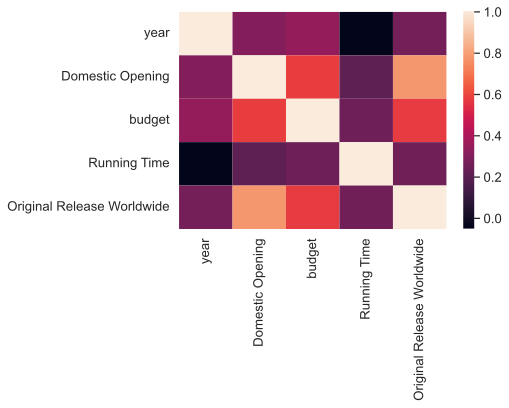

In [29]:
sns_heatmap = sns.heatmap(t_df.corr())

### Imouting values for 0 and NaN

In [30]:
movies2_df = t_df[t_df['Domestic Opening'] != 0]

In [31]:
movies2_df.astype(bool).sum(axis=0)

year                          800
Domestic Distributor          800
Domestic Opening              800
budget                        800
MPAA                          800
Running Time                  782
genres                        800
Original Release Worldwide    800
dtype: int64

In [32]:
movies2_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, Avatar to Cloverfield
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   year                        800 non-null    int64 
 1   Domestic Distributor        800 non-null    object
 2   Domestic Opening            800 non-null    int64 
 3   budget                      800 non-null    int64 
 4   MPAA                        750 non-null    object
 5   Running Time                800 non-null    int64 
 6   genres                      800 non-null    object
 7   Original Release Worldwide  800 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 56.2+ KB


In [33]:
movies2_df.head()

,year,Domestic Distributor,Domestic Opening,budget,MPAA,Running Time,genres,Original Release Worldwide
title,,,,,,,,
Avatar,2009,Twentieth Century Fox,77025481,237000000,PG-13,162,"['Action', 'Adventure', 'Fantasy', 'Science fi...",2743577587
Avengers: Endgame,2019,Walt Disney Studios Motion Pictures,357115007,356000000,PG-13,181,"['Action', 'Adventure', 'Drama', 'Science fict...",2797501328
Titanic,1997,Paramount Pictures,28638131,200000000,PG-13,194,"['Drama', 'Romance']",1843478449
Star Wars: Episode VII - The Force Awakens,2015,Walt Disney Studios Motion Pictures,247966675,245000000,PG-13,138,"['Action', 'Adventure', 'Science fiction']",2068223624
Jurassic World,2015,Universal Pictures,208806270,150000000,PG-13,124,"['Action', 'Adventure', 'Science fiction']",1670400637


In [34]:
movies2_df.rename(columns={'year': 'Year of Release', 'budget': 'Budget', 
                           'MPAA': 'MPAA Rating', 'genres': 'Genres', 
                           'Original Release Worldwide' : 'Original Release Gross Worldwide'}, inplace = True)

/Users/atrinsarmadi/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [35]:
import numpy as np

In [36]:
movies2_df['Running Time'].replace(0, np.nan, inplace=True)

/Users/atrinsarmadi/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [37]:
movies2_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, Avatar to Cloverfield
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year of Release                   800 non-null    int64  
 1   Domestic Distributor              800 non-null    object 
 2   Domestic Opening                  800 non-null    int64  
 3   Budget                            800 non-null    int64  
 4   MPAA Rating                       750 non-null    object 
 5   Running Time                      782 non-null    float64
 6   Genres                            800 non-null    object 
 7   Original Release Gross Worldwide  800 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 56.2+ KB


In [38]:
movies2_df['Running Time'].fillna(movies2_df['Running Time'].mean(), inplace = True)

/Users/atrinsarmadi/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [39]:
movies2_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, Avatar to Cloverfield
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year of Release                   800 non-null    int64  
 1   Domestic Distributor              800 non-null    object 
 2   Domestic Opening                  800 non-null    int64  
 3   Budget                            800 non-null    int64  
 4   MPAA Rating                       750 non-null    object 
 5   Running Time                      800 non-null    float64
 6   Genres                            800 non-null    object 
 7   Original Release Gross Worldwide  800 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 56.2+ KB


In [40]:
movies2_df.to_csv('movies2_df.csv')

### Adjust dollar value with inflation over time (Decided not to do this)

In [41]:
#### Tried this and it did not help with R^2. Also I think it'd be better for predictions not to include this, 
#### as otherwise I'd have to take into consideration the inflation for future predicted values.

In [42]:
## Needed to run once to install cpi
#import sys
#!{sys.executable} -m pip install cpi

In [43]:
# import cpi

In [44]:
#cpi.update()

In [45]:
#movies2_df['Domestic Opening Adjusted'] = movies2_df.apply(lambda x: cpi.inflate(x["Domestic Opening"], x["Year of Release"]), axis=1)


In [46]:
# CPI data only exist until 2018, so it will update everything up to 2018 for 2018 value. Should I do it?
# Function ready to use below if decide to

In [47]:
# def adjust_money_today(row):
#     try:
#         row['Domestic Opening'] = cpi.inflate(row['Domestic Opening'], row['Year of Release'])
#         row['Budget'] = cpi.inflate(row['Budget'], row['Year of Release'])
#         row['Original Release Gross Worldwide'] = (
#             cpi.inflate(row['Original Release Gross Worldwide'], row['Year of Release']))
#         return row
#     except CPIObjectDoesNotExist:
#         row['Domestic Opening'] = row['Domestic Opening']
#         row['Budget'] = row['Budget']
#         row['Original Release Gross Worldwide'] = row['Original Release Gross Worldwide']
#         return row

### Fixing list issues with Genres column and creating dummy variables from Genres

In [48]:
top_genres_list = (['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                   'Drama', 'Family', 'Fantasy', 'Romance', 'Science fiction', 
                    'Thriller'])

In [49]:
def get_genre_dummies(row):
    genres = row['Genres']
    
    if type(genres) == list: 
        for genre in genres:
            if genre in top_genres_list:
                row[genre] = 1
            else:
                row['Other_Genres'] = 1
    else:
        print(type(genres), ':', genres)
        
    return row

In [50]:
movies3_df = movies2_df.copy()

In [51]:
movies3_df["Genres"] = movies3_df["Genres"].apply(eval)

In [52]:
movies3_df.head()

,Year of Release,Domestic Distributor,Domestic Opening,Budget,MPAA Rating,Running Time,Genres,Original Release Gross Worldwide
title,,,,,,,,
Avatar,2009,Twentieth Century Fox,77025481,237000000,PG-13,162.0,"[Action, Adventure, Fantasy, Science fiction]",2743577587
Avengers: Endgame,2019,Walt Disney Studios Motion Pictures,357115007,356000000,PG-13,181.0,"[Action, Adventure, Drama, Science fiction]",2797501328
Titanic,1997,Paramount Pictures,28638131,200000000,PG-13,194.0,"[Drama, Romance]",1843478449
Star Wars: Episode VII - The Force Awakens,2015,Walt Disney Studios Motion Pictures,247966675,245000000,PG-13,138.0,"[Action, Adventure, Science fiction]",2068223624
Jurassic World,2015,Universal Pictures,208806270,150000000,PG-13,124.0,"[Action, Adventure, Science fiction]",1670400637


In [53]:
movies3_df = movies3_df.apply(get_genre_dummies, axis = 1)

In [54]:
movies3_df

,Action,Adventure,Animation,Budget,Comedy,Crime,Domestic Distributor,Domestic Opening,Drama,Family,Fantasy,Genres,MPAA Rating,Original Release Gross Worldwide,Other_Genres,Romance,Running Time,Science fiction,Thriller,Year of Release
title,,,,,,,,,,,,,,,,,,,,
Avatar,1.0,1.0,NaN,237000000,NaN,NaN,Twentieth Century Fox,77025481,NaN,NaN,1.0,"[Action, Adventure, Fantasy, Science fiction]",PG-13,2743577587,NaN,NaN,162.0,1.0,NaN,2009
Avengers: Endgame,1.0,1.0,NaN,356000000,NaN,NaN,Walt Disney Studios Motion Pictures,357115007,1.0,NaN,NaN,"[Action, Adventure, Drama, Science fiction]",PG-13,2797501328,NaN,NaN,181.0,1.0,NaN,2019
Titanic,NaN,NaN,NaN,200000000,NaN,NaN,Paramount Pictures,28638131,1.0,NaN,NaN,"[Drama, Romance]",PG-13,1843478449,NaN,1.0,194.0,NaN,NaN,1997
Star Wars: Episode VII - The Force Awakens,1.0,1.0,NaN,245000000,NaN,NaN,Walt Disney Studios Motion Pictures,247966675,NaN,NaN,NaN,"[Action, Adventure, Science fiction]",PG-13,2068223624,NaN,NaN,138.0,1.0,NaN,2015
Jurassic World,1.0,1.0,NaN,150000000,NaN,NaN,Universal Pictures,208806270,NaN,NaN,NaN,"[Action, Adventure, Science fiction]",PG-13,1670400637,NaN,NaN,124.0,1.0,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cold Mountain,NaN,1.0,NaN,79000000,NaN,NaN,Miramax,14500000,1.0,NaN,NaN,"[Adventure, Drama, History, Romance, War]",R,173013509,1.0,1.0,154.0,NaN,NaN,2003
Black Hawk Down,NaN,NaN,NaN,92000000,NaN,NaN,Revolution Studios,179823,1.0,NaN,NaN,"[Drama, History, War]",R,172989651,1.0,NaN,144.0,NaN,NaN,2001
The Grand Budapest Hotel,NaN,1.0,NaN,25000000,1.0,1.0,Fox Searchlight Pictures,811166,NaN,NaN,NaN,"[Adventure, Comedy, Crime]",R,172936941,NaN,NaN,99.0,NaN,NaN,2014


In [55]:
print(movies3_df.columns)

Index(['Action', 'Adventure', 'Animation', 'Budget', 'Comedy', 'Crime',
       'Domestic Distributor', 'Domestic Opening', 'Drama', 'Family',
       'Fantasy', 'Genres', 'MPAA Rating', 'Original Release Gross Worldwide',
       'Other_Genres', 'Romance', 'Running Time', 'Science fiction',
       'Thriller', 'Year of Release'],
      dtype='object')


In [56]:
movies3_df.drop(columns=['Genres'], inplace = True)

In [57]:
print(movies3_df.columns)

Index(['Action', 'Adventure', 'Animation', 'Budget', 'Comedy', 'Crime',
       'Domestic Distributor', 'Domestic Opening', 'Drama', 'Family',
       'Fantasy', 'MPAA Rating', 'Original Release Gross Worldwide',
       'Other_Genres', 'Romance', 'Running Time', 'Science fiction',
       'Thriller', 'Year of Release'],
      dtype='object')


In [58]:
movies3_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, Avatar to Cloverfield
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Action                            386 non-null    float64
 1   Adventure                         407 non-null    float64
 2   Animation                         118 non-null    float64
 3   Budget                            800 non-null    int64  
 4   Comedy                            308 non-null    float64
 5   Crime                             110 non-null    float64
 6   Domestic Distributor              800 non-null    object 
 7   Domestic Opening                  800 non-null    int64  
 8   Drama                             261 non-null    float64
 9   Family                            186 non-null    float64
 10  Fantasy                           211 non-null    float64
 11  MPAA Rating                       750 non-null    object 
 12  

In [59]:
movies3_df.head()

,Action,Adventure,Animation,Budget,Comedy,Crime,Domestic Distributor,Domestic Opening,Drama,Family,Fantasy,MPAA Rating,Original Release Gross Worldwide,Other_Genres,Romance,Running Time,Science fiction,Thriller,Year of Release
title,,,,,,,,,,,,,,,,,,,
Avatar,1.0,1.0,NaN,237000000,NaN,NaN,Twentieth Century Fox,77025481,NaN,NaN,1.0,PG-13,2743577587,NaN,NaN,162.0,1.0,NaN,2009
Avengers: Endgame,1.0,1.0,NaN,356000000,NaN,NaN,Walt Disney Studios Motion Pictures,357115007,1.0,NaN,NaN,PG-13,2797501328,NaN,NaN,181.0,1.0,NaN,2019
Titanic,NaN,NaN,NaN,200000000,NaN,NaN,Paramount Pictures,28638131,1.0,NaN,NaN,PG-13,1843478449,NaN,1.0,194.0,NaN,NaN,1997
Star Wars: Episode VII - The Force Awakens,1.0,1.0,NaN,245000000,NaN,NaN,Walt Disney Studios Motion Pictures,247966675,NaN,NaN,NaN,PG-13,2068223624,NaN,NaN,138.0,1.0,NaN,2015
Jurassic World,1.0,1.0,NaN,150000000,NaN,NaN,Universal Pictures,208806270,NaN,NaN,NaN,PG-13,1670400637,NaN,NaN,124.0,1.0,NaN,2015


In [60]:
movies3_df.to_csv('movies3_df.csv')

### Create dummy variables for other object variables

In [61]:
movies3_df = pd.read_csv('movies3_df.csv', index_col = 'title')

In [62]:
dummies = pd.get_dummies(movies3_df['MPAA Rating'], prefix='Rating')

In [63]:
movies4_df = pd.concat([movies3_df, dummies], axis = 1)

In [64]:
movies4_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, Avatar to Cloverfield
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Action                            386 non-null    float64
 1   Adventure                         407 non-null    float64
 2   Animation                         118 non-null    float64
 3   Budget                            800 non-null    int64  
 4   Comedy                            308 non-null    float64
 5   Crime                             110 non-null    float64
 6   Domestic Distributor              800 non-null    object 
 7   Domestic Opening                  800 non-null    int64  
 8   Drama                             261 non-null    float64
 9   Family                            186 non-null    float64
 10  Fantasy                           211 non-null    float64
 11  MPAA Rating                       750 non-null    object 
 12  

In [65]:
movies4_df.drop(columns = ['Domestic Distributor', 'MPAA Rating'], inplace = True)

In [66]:
movies4_df.fillna(0, inplace = True)

In [68]:
movies4_df.to_csv('movies4_df.csv')